# ЛР №7

# Численное интегрирование

# В8

$f(x) = x cos2x$
$a = 0, b = 1$

In [294]:
import matplotlib.pyplot as plt
from math import cos, sin, exp, sqrt
from tabulate import tabulate
from itertools import zip_longest

In [308]:
a = 0
b = 1
f = lambda x: x * cos(2*x)
F = lambda x: 0.5 * x * sin(2 * x) + 0.25 * cos(2 * x)
f2 = lambda x: -4 * sin(2 * x) - 4 * x * cos(2 * x)
f4 = lambda x: 32 * sin(2 * x) + 16 * x * cos(2 * x)

# 1
Найти шаг интегрирования $h$ для вычисления интеграла $ \int_a^b f(x)dx$ по формуле трапеций с точностью $0.001$

In [160]:
def step(f, eps, order, method):
    h0 = eps ** (1 / order)
    while True:
        amount = int((b - a) / h0)
        if not amount % 2:
            while 1/15 * abs(method(f, 2 * h0) - method(f, h0)) >= eps:
                h0 /= 2
            return h0
        else:
            h0 /= 2

In [89]:
def trap(f, h, f2=None):
    amount = int((b - a) / h)
    x = [a + h * i for i in range(1, amount)]
    integral = h / 2 * (f(a) + 2 * sum(f(i) for i in x) + f(b))
    if f2:
        m = max(abs(f2(xi)) for xi in x)
        r = 1 / 12 * m * abs(b - a) * h**2
        return integral, r
    return integral

In [309]:
h = step(f, 1e-3, 2, trap)
print('Шаг:', h)

Шаг: 0.007905694150420948


# 2
Вычислить интеграл по формуле трапеций с шагами $2h$ и $h$. Дать уточненную оценку погрешности.

In [310]:
int_h, r_h = trap(f, h, f2)
print('I =', int_h, 'R <=', r_h)
int_2h, r_2h = trap(f, 2 * h, f2) 
print('I =', int_2h, 'R <=', r_2h)

I = 0.10215984090826577 R <= 2.3947240658688164e-05
I = 0.10207517970275005 R <= 9.578539373869699e-05


# 3
Вычислить интеграл по формуле Симпсона с шагами $2h$ и $h$. Дать уточненную оценку погрешности.

In [92]:
def simpson(f, h):
    amount = int((b - a) / h)
    x = [a + h * i for i in range(1, amount)]
    integral = 2 * h / 3 * ((f(a) + f(b)) / 2 + 2 * sum(f(xi) for i, xi in enumerate(x, 1) if i % 2) + sum(f(xi) for i, xi in
                            enumerate(x, 1) if not i % 2))
    m = max(abs(f4(xi)) for xi in x)
    r = 1 / 180 * m * abs(b - a) * h**4
    return integral, r

In [311]:
ints_h, rs_h = simpson(f, h)
ints_2h, rs_2h = simpson(f, 2 * h)
print('I =', ints_h, 'R <=', rs_h)
print('I =', ints_2h, 'R <=', rs_2h)

I = 0.1021880613101044 R <= 7.296114065661151e-10
I = 0.10422007872020436 R <= 1.1672053262628788e-08


# 4
Вычислить определенный интеграл по формуле Ньютона–Лейбница. Сравнить приближенные значения интеграла с точными. Какая формула численного интегрирования дала более точный результат?

In [312]:
print('I =', F(b) - F(a))

I = 0.10061200427605527


# 5
Найти шаг интегрирования для решения задачи Коши методом Рунге-Кутта (IV) с точностью $10^{-4}$.

In [378]:
a = 1
b = 1.6
fk = lambda x, y: 0.5 * ((exp(2 * x) * (2 + 3 * cos(x))) / y - (3 * y * cos(x)))

In [366]:
def k_step(f, eps, order, method):
    h0 = eps**(1 / order)
    while True:
        amount = int((b - a) / h0)
        if not amount % 2:
            yh = method(f, h0)[1]
            y2h = method(f, 2 * h0)[1]
            delta = [abs(i - j) for i, j in zip(y2h, yh)]
            if 1/15 * delta[1] < eps:
                return h0
            h0 /= 2 
        else:
            h0 /= 2

In [223]:
def r_cutt(f, h):
    amount = int((b - a) / h)
    x = [a + h * i for i in range(amount + 1)]
    y = [0.0 for i in range(amount + 1)]
    y[0] = 2.0
    for i in range(1, amount + 1):
        k1 = h * f(x[i - 1], y[i - 1])
        k2 = h * f(x[i - 1] + h / 2, y[i - 1] + k1 / 2)
        k3 = h * f(x[i - 1] + h / 2, y[i - 1] + k2 / 2)
        k4 = h * f(x[i - 1], y[i - 1] + k3)
        y[i] = y[i - 1] + 1 / 6 * (k1 + 2 * (k2 + k3) + k4)
    return x, y

In [379]:
h = k_step(fk, 1e-4, 4, r_cutt)
print('Шаг:', h)

Шаг: 0.0001953125


# 6
Найти решение задачи Коши на отрезке $[a, b]$ методом Рунге-Кутта (IV), методом Адамса (2-го порядка) с точностью $10^{-4}$. Построить приближенные интегральные кривые.

In [367]:
def adams(f, h):
    amount = int((b - a) / h)
    x = [a + h * i for i in range(amount + 1)]
    y = [0.0 for i in range(amount + 1)]
    y[0] = 2.0
    y[1] = y[0] + h * f(x[0], y[0])
    for i in range(2, amount + 1):
        y[i] = y[i - 1] + h * (3 / 2 * f(x[i - 1], y[i - 1]) - 1 / 2 * f(x[i - 2], y[i - 2]))
    return x, y

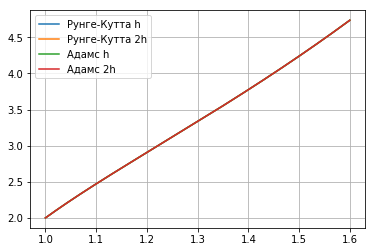

In [380]:
xh_rc, yh_rc = r_cutt(fk, h)
x2h_rc, y2h_rc = r_cutt(fk, 2 * h)
xh_a, yh_a = adams(fk, h)
x2h_a, y2h_a = adams(fk, 2 * h)
plt.plot(xh_rc, yh_rc)
plt.plot(x2h_rc, y2h_rc)
plt.plot(xh_a, yh_a)
plt.plot(x2h_a, y2h_a)
plt.grid(True)
plt.legend(['Рунге-Кутта h', 'Рунге-Кутта 2h', 'Адамс h', 'Адамс 2h'])
plt.show()

# 7
Найти решение задачи Коши на отрезке $[a, b]$ методом Эйлера. Построить на одном графике (с п. 6) приближенную интегральную кривую.

In [227]:
def eler(f, h):
    amount = int((b - a) / h) + 1
    x = [a + h * i for i in range(amount)]
    y = [0.0 for i in range(amount)]
    y[0] = 2.0
    for i in range(1, amount):
        y[i] = y[i - 1] + h * f(x[i - 1], y[i - 1])
    return x, y

In [369]:
xh_e, yh_e = eler(fk, h)
x2h_e, y2h_e = eler(fk, 2 * h)

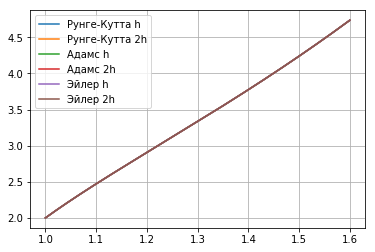

In [381]:
plt.plot(xh_rc, yh_rc)
plt.plot(x2h_rc, y2h_rc)
plt.plot(xh_a, yh_a)
plt.plot(x2h_a, y2h_a)
plt.plot(xh_e, yh_e)
plt.plot(x2h_e, y2h_e)
plt.grid(True)
plt.legend(['Рунге-Кутта h', 'Рунге-Кутта 2h', 'Адамс h', 'Адамс 2h', 'Эйлер h', 'Эйлер 2h'])
plt.show()

# 8
Найти точное решение задачи Коши. Сравнить точное решение с приближенными. Найти максимумы модулей отклонений в узловых точках приближенного решения от точного.

In [384]:
def yf(x):
    ex6 = exp(6 * sin(0.5 * x) * cos(0.5 * x))
    ex3 = exp(3 * sin(0.5 * x) * cos(0.5 * x))
    res = sqrt(ex6 * exp(2*x)  - exp(2) * ex6 + 4 * ex6) / ex3
    return res

3.174063946436971

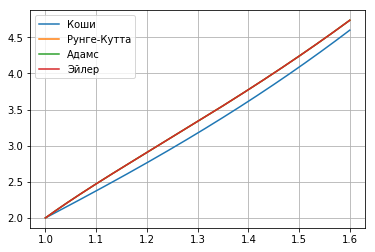

In [390]:
y_kosh = [yf(xi) for xi in xh_rc]
plt.plot(xh_rc, y_kosh)
plt.plot(xh_rc, yh_rc)
plt.plot(xh_a, yh_a)
plt.plot(xh_e, yh_e)
plt.grid(True)
plt.legend(['Коши', 'Рунге-Кутта', 'Адамс', 'Эйлер'])
plt.show()

# 9
Записать результаты расчетов в сводные таблицы.

In [392]:
rez = [abs(i - j) for i, j in zip(yh_rc, y_kosh)]
table = [i for i in zip(xh_rc, yh_rc, y_kosh, rez)]
print("\nМетод Рунге-Кутта(IV)\n")
print(tabulate(table, headers=['xi', 'yi', '~yi', '∆i = |yi - ~yi|'], tablefmt='fancy_grid'))


Метод Рунге-Кутта(IV)

╒═════════╤═════════╤═════════╤═══════════════════╕
│      xi │      yi │     ~yi │   ∆i = |yi - ~yi| │
╞═════════╪═════════╪═════════╪═══════════════════╡
│ 1       │ 2       │ 2       │       0           │
├─────────┼─────────┼─────────┼───────────────────┤
│ 1.0002  │ 2.00099 │ 2.00072 │       0.00026796  │
├─────────┼─────────┼─────────┼───────────────────┤
│ 1.00039 │ 2.00198 │ 2.00144 │       0.000535525 │
├─────────┼─────────┼─────────┼───────────────────┤
│ 1.00059 │ 2.00297 │ 2.00216 │       0.000802696 │
├─────────┼─────────┼─────────┼───────────────────┤
│ 1.00078 │ 2.00396 │ 2.00289 │       0.00106947  │
├─────────┼─────────┼─────────┼───────────────────┤
│ 1.00098 │ 2.00494 │ 2.00361 │       0.00133586  │
├─────────┼─────────┼─────────┼───────────────────┤
│ 1.00117 │ 2.00593 │ 2.00433 │       0.00160185  │
├─────────┼─────────┼─────────┼───────────────────┤
│ 1.00137 │ 2.00692 │ 2.00505 │       0.00186744  │
├─────────┼─────────┼─────────┼─────────

In [394]:
rez = [abs(i - j) for i, j in zip(yh_a, y_kosh)]
table = [i for i in zip_longest(xh_a, yh_a, y_kosh, rez, fillvalue='')]
print("\nМетод Адамса\n")
print(tabulate(table, headers=['xi', 'yi', '~yi', '∆i = |yi - ~yi|'], tablefmt='fancy_grid'))


Метод Адамса

╒═════════╤═════════╤═════════╤═══════════════════╕
│      xi │      yi │     ~yi │   ∆i = |yi - ~yi| │
╞═════════╪═════════╪═════════╪═══════════════════╡
│ 1       │ 2       │ 2       │       0           │
├─────────┼─────────┼─────────┼───────────────────┤
│ 1.0002  │ 2.00099 │ 2.00072 │       0.000268219 │
├─────────┼─────────┼─────────┼───────────────────┤
│ 1.00039 │ 2.00198 │ 2.00144 │       0.000535855 │
├─────────┼─────────┼─────────┼───────────────────┤
│ 1.00059 │ 2.00297 │ 2.00216 │       0.000803096 │
├─────────┼─────────┼─────────┼───────────────────┤
│ 1.00078 │ 2.00396 │ 2.00289 │       0.00106994  │
├─────────┼─────────┼─────────┼───────────────────┤
│ 1.00098 │ 2.00494 │ 2.00361 │       0.0013364   │
├─────────┼─────────┼─────────┼───────────────────┤
│ 1.00117 │ 2.00593 │ 2.00433 │       0.00160246  │
├─────────┼─────────┼─────────┼───────────────────┤
│ 1.00137 │ 2.00692 │ 2.00505 │       0.00186813  │
├─────────┼─────────┼─────────┼──────────────────

In [395]:
rez = [abs(i - j) for i, j in zip(yh_e, y_kosh)]
table = [i for i in zip_longest(xh_e, yh_e, y_kosh, rez, fillvalue='')]
print("\nМетод Эйлера\n")
print(tabulate(table, headers=['xi', 'yi', '~yi', '∆i = |yi - ~yi|'], tablefmt='fancy_grid'))


Метод Эйлера

╒═════════╤═════════╤═════════╤═══════════════════╕
│      xi │      yi │     ~yi │   ∆i = |yi - ~yi| │
╞═════════╪═════════╪═════════╪═══════════════════╡
│ 1       │ 2       │ 2       │       0           │
├─────────┼─────────┼─────────┼───────────────────┤
│ 1.0002  │ 2.00099 │ 2.00072 │       0.000268219 │
├─────────┼─────────┼─────────┼───────────────────┤
│ 1.00039 │ 2.00198 │ 2.00144 │       0.000536042 │
├─────────┼─────────┼─────────┼───────────────────┤
│ 1.00059 │ 2.00297 │ 2.00216 │       0.00080347  │
├─────────┼─────────┼─────────┼───────────────────┤
│ 1.00078 │ 2.00396 │ 2.00289 │       0.0010705   │
├─────────┼─────────┼─────────┼───────────────────┤
│ 1.00098 │ 2.00495 │ 2.00361 │       0.00133714  │
├─────────┼─────────┼─────────┼───────────────────┤
│ 1.00117 │ 2.00593 │ 2.00433 │       0.00160339  │
├─────────┼─────────┼─────────┼───────────────────┤
│ 1.00137 │ 2.00692 │ 2.00505 │       0.00186924  │
├─────────┼─────────┼─────────┼──────────────────

In [396]:
d1 = [abs(i - j) for i, j in zip(y_kosh, yh_rc)]
d2 = [abs(i - j) for i, j in zip(y_kosh, yh_a)]
table = [i for i in zip(xh_rc, y_kosh, yh_rc, d1, yh_a, d2)]
print(tabulate(table, headers=['xi', 'Точное решение yi', 'Метод Рунге-Кутта yi', '∆i1', 'Метод Адамса yi', '∆i2'], tablefmt='fancy_grid'))

╒═════════╤═════════════════════╤════════════════════════╤═════════════╤═══════════════════╤═════════════╕
│      xi │   Точное решение yi │   Метод Рунге-Кутта yi │         ∆i1 │   Метод Адамса yi │         ∆i2 │
╞═════════╪═════════════════════╪════════════════════════╪═════════════╪═══════════════════╪═════════════╡
│ 1       │             2       │                2       │ 0           │           2       │ 0           │
├─────────┼─────────────────────┼────────────────────────┼─────────────┼───────────────────┼─────────────┤
│ 1.0002  │             2.00072 │                2.00099 │ 0.00026796  │           2.00099 │ 0.000268219 │
├─────────┼─────────────────────┼────────────────────────┼─────────────┼───────────────────┼─────────────┤
│ 1.00039 │             2.00144 │                2.00198 │ 0.000535525 │           2.00198 │ 0.000535855 │
├─────────┼─────────────────────┼────────────────────────┼─────────────┼───────────────────┼─────────────┤
│ 1.00059 │             2.00216 │    

In [397]:
table = [(max(d1), max(d2))]
print(tabulate(table, headers=['max ∆i1', 'max ∆i2'], tablefmt='fancy_grid'))

╒═══════════╤═══════════╕
│   max ∆i1 │   max ∆i2 │
╞═══════════╪═══════════╡
│  0.161817 │  0.161899 │
╘═══════════╧═══════════╛
